In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

## Load Airbnb Dataset

In [4]:
Airbnb_df = pd.read_csv('Airbnb NYC 2019.csv')
Airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14879,11801984,"Bright, contemporary and best location.",24232061,Tracy,Manhattan,Upper East Side,40.77189,-73.95540,Private room,122.0,9.0,12.0,2018-10-27,0.32,3.0,160.0
14880,11802086,5 rooms in clean apartment /West Harlem,62852828,Latrisha,Manhattan,Harlem,40.82443,-73.95265,Entire home/apt,400.0,3.0,2.0,2018-05-11,0.06,2.0,88.0
14881,11803487,Home 4 Medical Professionals-Brooklyn Hospital,26377263,Stat,Brooklyn,Fort Greene,40.68906,-73.97763,Private room,54.0,30.0,0.0,NaN,NaN,43.0,361.0
14882,11803893,Home 4 Medical Professionals-LIU,26377263,Stat,Brooklyn,Fort Greene,40.69006,-73.98056,Private room,54.0,30.0,0.0,NaN,NaN,43.0,361.0


## Data Exploration and Data Cleaning

In [7]:
Airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149.0,225.0,150.0,89.0,80.0


In [9]:
#checking what are the variables here:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## so now first rename few columns for better understanding of variables -

In [12]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

In [14]:
# use a pandas function to rename the current function
Airbnb_df = Airbnb_df.rename(columns = rename_col)
Airbnb_df.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0


In [16]:
#checking shape of Airbnb dataset
Airbnb_df.shape

(14884, 16)

In [18]:
#basic information about the dataset
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           14884 non-null  int64  
 1   listing_name         14872 non-null  object 
 2   host_id              14884 non-null  int64  
 3   host_name            14871 non-null  object 
 4   neighbourhood_group  14883 non-null  object 
 5   neighbourhood        14883 non-null  object 
 6   latitude             14883 non-null  float64
 7   longitude            14883 non-null  float64
 8   room_type            14883 non-null  object 
 9   price                14883 non-null  float64
 10  minimum_nights       14883 non-null  float64
 11  total_reviews        14883 non-null  float64
 12  last_review          12428 non-null  object 
 13  reviews_per_month    12428 non-null  float64
 14  host_listings_count  14883 non-null  float64
 15  availability_365     14883 non-null 

So, host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.

While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables

In [22]:
# check duplicate rows in dataset
Airbnb_df = Airbnb_df.drop_duplicates()
Airbnb_df.count()

listing_id             14884
listing_name           14872
host_id                14884
host_name              14871
neighbourhood_group    14883
neighbourhood          14883
latitude               14883
longitude              14883
room_type              14883
price                  14883
minimum_nights         14883
total_reviews          14883
last_review            12428
reviews_per_month      12428
host_listings_count    14883
availability_365       14883
dtype: int64

so, there is no any duplicate rows in Dataset

In [25]:
# checking null values of each columns
Airbnb_df.isnull().sum()

listing_id                0
listing_name             12
host_id                   0
host_name                13
neighbourhood_group       1
neighbourhood             1
latitude                  1
longitude                 1
room_type                 1
price                     1
minimum_nights            1
total_reviews             1
last_review            2456
reviews_per_month      2456
host_listings_count       1
availability_365          1
dtype: int64

In [27]:
Airbnb_df['listing_name'].fillna('unknown',inplace=True)
Airbnb_df['host_name'].fillna('no_name',inplace=True)

In [29]:
#so the null values are removed
Airbnb_df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

now, the columns last_review and reviews_per_month have total 10052 null values each.

last_review column is not required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

listing_id also not that much of important for our analysis but i dont remove because of listing_id and listing_name is pair and removing listing_id it still wont make much difference. make sense right ?

In [32]:
Airbnb_df = Airbnb_df.drop(['last_review'], axis=1)     #removing last_review column beacause of not that much important

In [34]:
Airbnb_df.info()      # the last_review column is deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           14884 non-null  int64  
 1   listing_name         14884 non-null  object 
 2   host_id              14884 non-null  int64  
 3   host_name            14884 non-null  object 
 4   neighbourhood_group  14883 non-null  object 
 5   neighbourhood        14883 non-null  object 
 6   latitude             14883 non-null  float64
 7   longitude            14883 non-null  float64
 8   room_type            14883 non-null  object 
 9   price                14883 non-null  float64
 10  minimum_nights       14883 non-null  float64
 11  total_reviews        14883 non-null  float64
 12  reviews_per_month    12428 non-null  float64
 13  host_listings_count  14883 non-null  float64
 14  availability_365     14883 non-null  float64
dtypes: float64(8), int64(2), object(5)
m

The reviews_per_month column also containing null values and we can simple put 0 reviews by replacing NAN's i think this is make sense -

In [39]:
Airbnb_df['reviews_per_month'] = Airbnb_df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [41]:
# the null values are replaced by 0 value
Airbnb_df['reviews_per_month'].isnull().sum()   

0

so there is no null value now in 'reviews_per_month' column because we replaced null value by 0 value. this will make sense because there is no any such data to find those null value

In [44]:
#so now check Dataset columns changed and null values, last_review column removed.
Airbnb_df.sample(5)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
10276,7862762,Spacious pre-war apartment,40548594,Justine,Manhattan,Financial District,40.70623,-74.00510,Entire home/apt,150.0,2.0,52.0,1,1.0,72.0
2176,1010785,Astoria awesome balcony apartment PARKING AVAI...,3898812,Ahmed,Queens,Astoria,40.76295,-73.92652,Entire home/apt,130.0,1.0,58.0,0,1.0,301.0
9795,7535791,"Big, bright loft in Williamsburg",39483454,Laura,Brooklyn,Williamsburg,40.71290,-73.95565,Entire home/apt,180.0,14.0,2.0,0,1.0,0.0
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50.0,500.0,10.0,0,1.0,365.0
5235,3783021,Entire Luxury Newly Renovated Studio,3716641,Ofer,Manhattan,Upper West Side,40.79203,-73.97299,Entire home/apt,99.0,30.0,14.0,0,8.0,135.0


## 
Check Unique Value for variables and doing some experiment-

In [49]:
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
Airbnb_df['listing_id'].nunique()

14884

In [51]:
# so there are 221 unique neighborhood in Dataset
Airbnb_df['neighbourhood'].nunique()

189

In [53]:
#and total 5 unique neighborhood_group in Dataset
Airbnb_df['neighbourhood_group'].nunique()

5

In [55]:
#so total 11453 different hosts in Airbnb-NYC
Airbnb_df['host_name'].nunique()

4920

In [57]:
# most of the listing/property are different in Dataset
Airbnb_df['listing_name'].nunique()

14725

In [59]:
Airbnb_df[Airbnb_df['host_name']=='David']['listing_name'].nunique()

# so here same host David operates different 402 listing/property

117

In [61]:

Airbnb_df[Airbnb_df['listing_name']==Airbnb_df['host_name']].head()

# there are few listings where the listing/property name and the host have same names

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200.0,5.0,12.0,0,1.0,25.0
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95.0,2.0,7.0,0,1.0,238.0


## Describe the Dataset and removing outliers

In [64]:
# describe the DataFrame 
Airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,1.488400e+04,1.488400e+04,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14884.000000,14883.000000,14883.000000
mean,5.521759e+06,1.599426e+07,40.729763,-73.958634,155.733118,7.485252,39.405832,0.471043,3.124504,107.324531
std,3.492695e+06,1.597834e+07,0.052082,0.036243,247.072148,25.980234,64.194251,1.043260,10.488179,134.440878
min,2.539000e+03,2.571000e+03,40.499790,-74.240840,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.243752e+06,2.921051e+06,40.689645,-73.983615,75.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,5.538382e+06,9.916160e+06,40.723370,-73.958900,117.000000,3.000000,10.000000,0.000000,1.000000,11.000000
75%,8.646907e+06,2.482611e+07,40.763960,-73.942780,176.000000,5.000000,49.000000,0.000000,2.000000,238.000000
max,1.180424e+07,6.285283e+07,40.908040,-73.712990,10000.000000,1250.000000,629.000000,14.000000,121.000000,365.000000


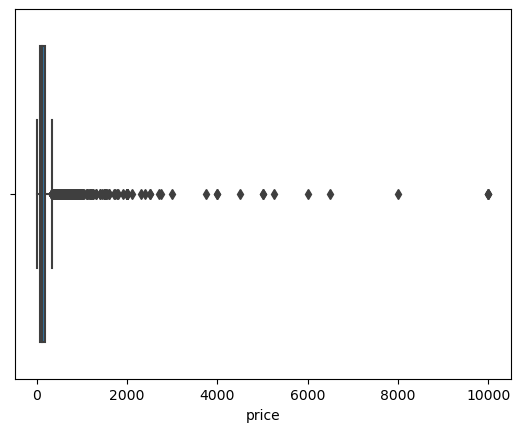

In [66]:
sns.boxplot(x = Airbnb_df['price'])

plt.show()

## Data Visualization

(1) Distribution Of Airbnb Bookings Price Range Using Histogram

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

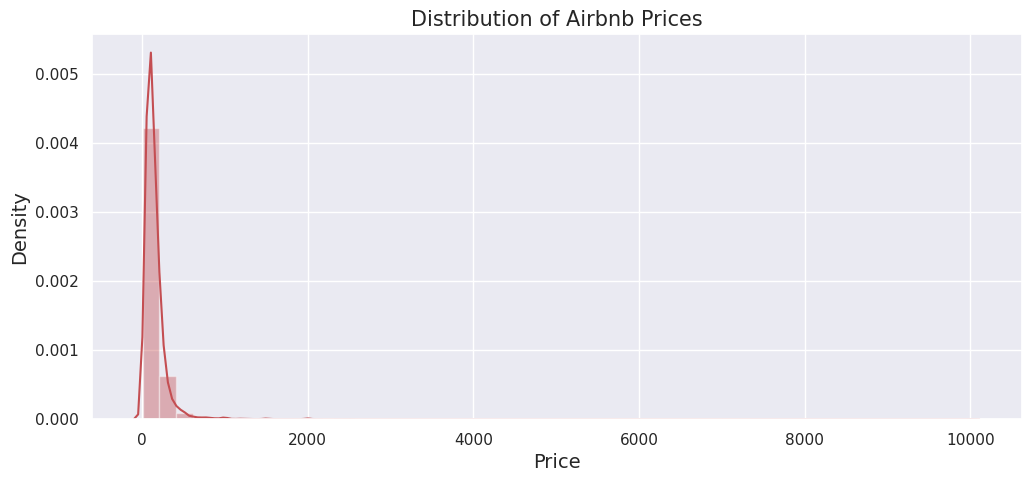

In [77]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(Airbnb_df['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

(2) Total Listing/Property count in Each Neighborhood Group using Count plot

In [80]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = Airbnb_df['neighbourhood_group'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood_group = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhood_group

,Neighborhood_Groups,Listing_Counts
0,Manhattan,6990
1,Brooklyn,6507
2,Queens,1133
3,Bronx,184
4,Staten Island,69
